In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [0]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPythonc

In [3]:
print(tf.__version__)

1.12.0


In [4]:
# Loading the dataset
(train_features,train_labels),(test_features,test_labels) = keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
# Normalizing the training data
train_mean = np.mean(train_features,axis=0)
train_std = np.std(train_features,axis=0)
train_features = (train_features - train_mean)/train_std

In [0]:
def build_model():
  model = Sequential([\
                     Dense(20, activation = tf.nn.relu, input_shape = [len(train_features[0])]),
                     Dense(1)
                     ])
  model.compile(optimizer = tf.train.AdamOptimizer(),
               loss='mse',
               metrics=['mae','mse'])
  return model

In [15]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.',end='')
    
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50)
history = model.fit(train_features, train_labels, epochs = 1000, verbose = 0, validation_split = 0.1, callbacks = [early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print("Final Root Mean Squared Error on validation set = {}".format(round(rmse_final,3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...................................................................................
Final Root Mean Squared Error on validation set = 2.258


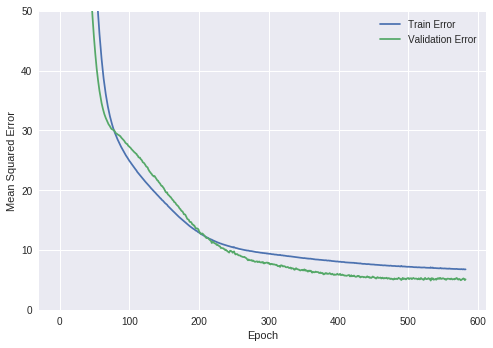

In [19]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'], label = 'Train Error')
  plt.plot(hist['epoch'],hist['val_mean_squared_error'], label = 'Validation Error')
  plt.legend()
  plt.ylim([0,50])
plot_history(history)
  